In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor

In [2]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
 
# Dataset is now stored in a Pandas Dataframe

recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Dataset is now stored in a Pandas Dataframe

death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
 
# Dataset is now stored in a Pandas Dataframe


In [3]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [4]:
confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

In [5]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
153166,NaN,Vietnam,14.058324,108.277199,7/23/21,78269
153167,NaN,West Bank and Gaza,31.952200,35.233200,7/23/21,315968
153168,NaN,Yemen,15.552727,48.516388,7/23/21,7003
153169,NaN,Zambia,-13.133897,27.849332,7/23/21,190615
153170,NaN,Zimbabwe,-19.015438,29.154857,7/23/21,95686


In [6]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [8]:
df = df[['Country/Region','Date','Confirmed','Recovered','Deaths']].loc[df['Country/Region'] == 'France']


In [9]:
df.tail()

,Country/Region,Date,Confirmed,Recovered,Deaths
153018,France,7/23/21,1005,NaN,1
153019,France,7/23/21,26,NaN,0
153020,France,7/23/21,2481,NaN,38
153021,France,7/23/21,445,NaN,7
153022,France,7/23/21,5875702,NaN,110597


In [10]:
df = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [11]:
df.tail()

,Confirmed,Recovered,Deaths
Date,,,
9/5/20,357927,333056.0,30708
9/6/20,364943,93701.0,30712
9/7/20,369209,4695714.0,30735
9/8/20,375947,732465.0,30773
9/9/20,384566,66643.0,30805


In [12]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()
df_per_day.tail()

,Confirmed,Recovered,Deaths
Date,,,
9/5/20,357927,333056.0,30708
9/6/20,364943,93701.0,30712
9/7/20,369209,4695714.0,30735
9/8/20,375947,732465.0,30773
9/9/20,384566,66643.0,30805


<AxesSubplot:xlabel='Date'>

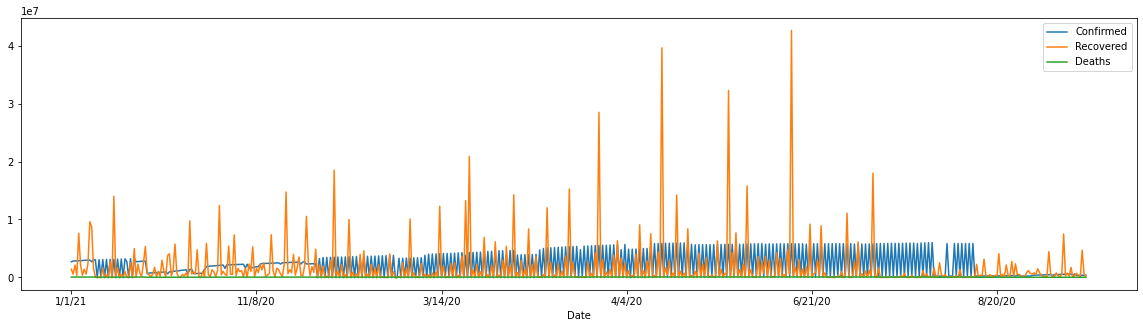

In [13]:
df_per_day.plot(kind='line',figsize=(20,5))


In [14]:
#Facebook Forecasting Library
import fbprophet

In [15]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [16]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [17]:
# Split Dataset
df

,Confirmed,Recovered,Deaths
Date,,,
1/1/21,2697014,1424070.0,64892
1/10/21,2840864,571056.0,67885
1/11/21,2844680,2122909.0,68197
1/12/21,2864360,349959.0,68939
1/13/21,2888292,7629357.0,69168
...,...,...,...
9/5/20,357927,333056.0,30708
9/6/20,364943,93701.0,30712
9/7/20,369209,4695714.0,30735


In [18]:
France_cases = df.reset_index()

In [19]:
France_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/1/21,2697014,1424070.0,64892
1,1/10/21,2840864,571056.0,67885
2,1/11/21,2844680,2122909.0,68197
3,1/12/21,2864360,349959.0,68939
4,1/13/21,2888292,7629357.0,69168


In [20]:
France_cases.tail()

,Date,Confirmed,Recovered,Deaths
544,9/5/20,357927,333056.0,30708
545,9/6/20,364943,93701.0,30712
546,9/7/20,369209,4695714.0,30735
547,9/8/20,375947,732465.0,30773
548,9/9/20,384566,66643.0,30805


In [21]:
confirmed_cases = France_cases[["Date","Confirmed"]]
recovered_cases = France_cases[["Date","Recovered"]]

In [22]:
confirmed_cases.shape

(549, 2)

In [23]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/Users/djiby/opt/anaconda3/envs/2021-4A-IABD-2_tf/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [24]:
train = confirmed_cases[:12]
test = confirmed_cases[12:]

In [25]:
train 

,ds,y
0,1/1/21,2697014
1,1/10/21,2840864
2,1/11/21,2844680
3,1/12/21,2864360
4,1/13/21,2888292
5,1/14/21,2909723
6,1/15/21,2931040
7,1/16/21,2952449
8,1/17/21,2969091
9,1/18/21,2972889


In [26]:
test

,ds,y
12,1/20/21,3023661
13,1/21/21,3046371
14,1/22/20,0
15,1/22/21,3069695
16,1/23/20,0
...,...,...
544,9/5/20,357927
545,9/6/20,364943
546,9/7/20,369209
547,9/8/20,375947


In [27]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [28]:
# Future Date
future_dates = m.make_future_dataframe(periods=250)

In [29]:
future_dates


,ds
0,2021-01-01
1,2021-01-02
2,2021-01-10
3,2021-01-11
4,2021-01-12
...,...
257,2021-09-22
258,2021-09-23
259,2021-09-24
260,2021-09-25


In [30]:
# Prediction
prediction =  m.predict(future_dates)

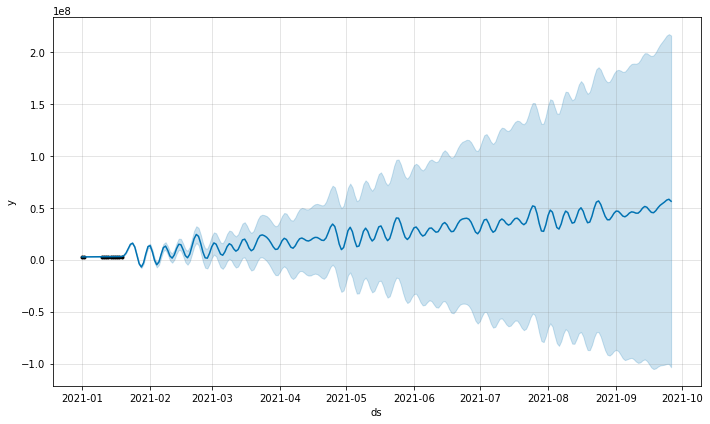

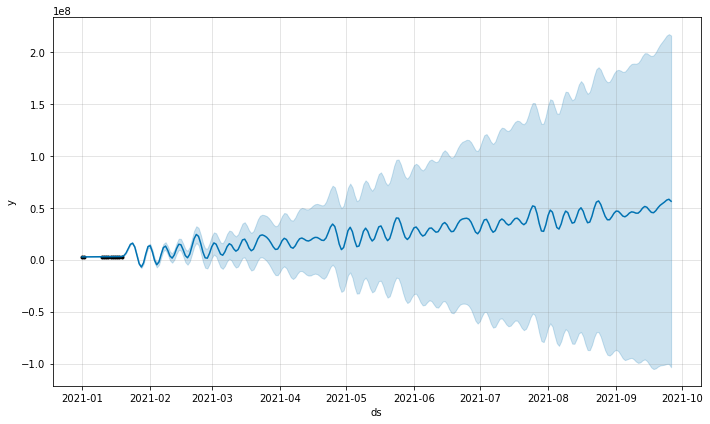

In [31]:
# Plot Prediction
m.plot(prediction)

In [32]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

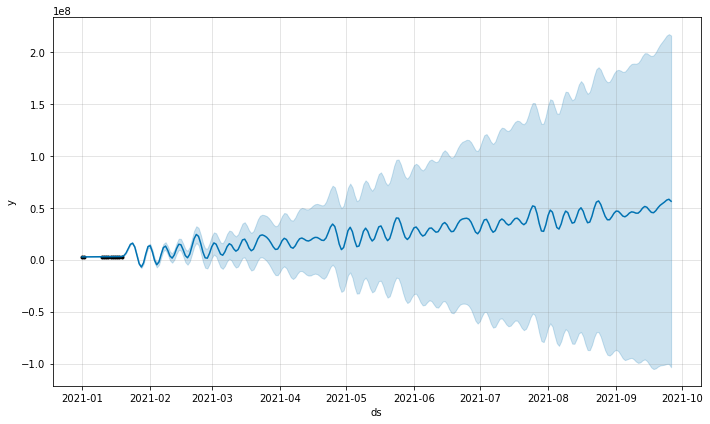

In [33]:
fig = m.plot(prediction)
#c = add_changepoints_to_plot(fig.gca(),m,prediction)

In [34]:
df = px.data.confirmed_cases()
X = df.ds.values[:, None]
X_train, X_test, y_train, y_test = train_test_split(
    X, df.tip, random_state=42)

def train_and_display(name):
    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])

    return fig

AttributeError: module 'plotly.express.data' has no attribute 'confirmed_cases'

In [ ]:
df = px.confirmed_cases()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, df.tip)
y_dist = knn_dist.predict(x_range.reshape(-1, 1))

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, df.tip)
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', color='sex', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show()